In [7]:
# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import matplotlib.pyplot as plt
import cv2
import numpy as np


# get image
im = cv2.imread("input.jpg")

ModuleNotFoundError: No module named 'centermask'

In [6]:
# Create config
cfg = get_cfg()
#cfg.merge_from_file("../detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.merge_from_file("../detectron2/configs/centermask/centermask_V_39_eSE_FPN_ms_3x.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
#cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"
cfg.MODEL.WEIGHTS = "/home/josmar/proyectos/centermask2/centermask2-V-39-eSE-FPN-ms-3x.pth"
# Create predictor
predictor = DefaultPredictor(cfg)

# Make prediction
outputs = predictor(im)

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
out=v.get_image()[:, :, ::-1]
cv2.imshow("lol",out)
k = cv2.waitKey(0)
if k == 27: # wait for ESC key to exit
  cv2.destroyAllWindows()

Config '../detectron2/configs/centermask/centermask_V_39_eSE_FPN_ms_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


KeyError: 'Non-existent config key: MODEL.VOVNET'

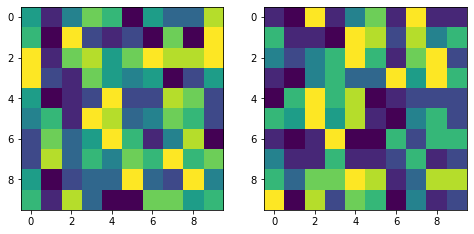

In [10]:

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

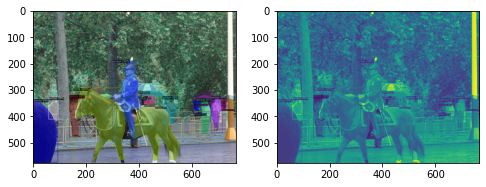

In [16]:
fig=plt.figure(figsize=(8, 8))
columns = 2
rows = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(out)
fig.add_subplot(rows, columns, 2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2GRAY))
plt.show()